In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [ ]:
test_data = pd.read_csv("imdb_urdu_reviews_test.csv")
train_data = pd.read_csv("imdb_urdu_reviews_train.csv")

In [ ]:
train_data.tail()

,review,sentiment
39995,اگرچہ میں نے سب سے زیادہ تکنیکی طور پر اعلی در...,positive
39996,اس فلم نے مجھے حیرت سے دوچار کردیا۔ میں اسے عا...,positive
39997,مجھے افسوس ہے ، لیکن یہاں تک کہ ٹی جے ہوکر کے ...,negative
39998,اس فلم کو اکیڈمی کے ایوارڈ کے لئے نہیں سمجھا ج...,positive
39999,ٹاک ریڈیو کسی شخص کو حادثاتی طور پر زندگی کے د...,positive


In [ ]:
# Combine Both Files to Preprocess
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [ ]:
# Make copy of a dataset
df =  data.copy()

In [ ]:
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


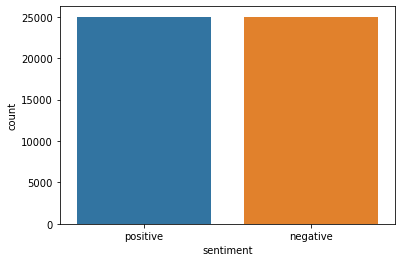

In [ ]:
sns.countplot( x = 'sentiment', data = df );


In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df['review'] = df['review'].apply(normalize)
df['review'] = df['review'].apply(remove_accents)
df['review'] = df['review'].apply(replace_urls)
df['review'] = df['review'].apply(replace_emails)
df['review'] = df['review'].apply(replace_currency_symbols)
df['review'] = df['review'].apply(normalize_whitespace)

In [ ]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
len(STOP_WORDS)

430

In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)
df['lemmatized_text'] = df['review'].apply(lemitizeStr)
df['review'][2], df['lemmatized_text'][2]

('معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ، طیارے ملتے ، جگہ جارہا عرصہ ترک کردیا ، بیوی بچ leftہ چھوڑا تھا۔ ذہنی معذور لڑکے قتل الزام ہے۔ دیکھتے ، اخبار عنوان پکڑا عورت پڑھ ہے۔ بے رحمی ، پوچھتی اخبار رکھ ، خاتون دوسرے حصے پیش ہے۔ ٹھیک ، پوچھا ، عورت چاہتی ، حص giveہ پڑھ ہے۔ میتھیو ریان ہوج پریشان فلم لکھا ہدایت معاشرے کئی عکاسی ہے۔ در حقیقت ، ہوج اشارہ غلط ہے۔ فلم لیلینڈ نوعمر عمر پیش ، خیالی حقیقت فرق کرسکتا ہے۔ بات عیاں انسان قتل ، پیارے معصوم لڑکے مستحق ، ، خاندان مقتول لڑکے کنبہ مہلک نتائج برآمد گے۔ حقیقت ، لیلینڈ پتہ جرم ارتکاب چیز ترغیب توبہ ہے۔ ظاہر والدین طلاق لیلینڈ صدمہ پہنچا ہے۔ باپ متلو .ن آدمی پرواہ تھا۔ پرل ، نوعمر حراستی مرکز استاد نوجوان ہنگامہ دیکھتا مدد چاہتا ، بدقسمتی ، موقع ہے۔ فلم اچھی بات ڈان چیڈل ، عمدہ اداکار ہمیشہ بچاتا ہے۔ . ہوج ہدایت کاری تحت جوڑا کاسٹ اچھ workا کام ہے۔ کیون اسپیس ملزم قاتل مغرور والد کردار ادا اچھا موقع تکبر بیوقوف نفرت ہیں۔ تھوڑی ، فلم جوابات زیادہ سوالات ہے۔',
 'معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ، طیارے ملتے ، جگہ جارہا 

In [ ]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...,positive,1,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...
1,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...,negative,0,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (35000,)
Shape of X_test (15000,)
Shape of Y_train (35000,)
Shape of Y_test (15000,)


In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:

def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)
    # testing
    test_predictionLR = LR.predict(test_vecs)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(LR, train_vecs, Y_train, cv=4)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    print('Cross-Validation Accuracy min,med,mod', scores.min(), scores.mean(), scores.max())
    print('Results of Logistic Regression Classifier on TF-IDF Vectorizer')

    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)


Cross-Validation Accuracy Scores [0.86548571 0.86468571 0.86902857 0.86297143]
Cross-Validation Accuracy min,med,mod 0.8629714285714286 0.8655428571428571 0.8690285714285715
Results of Logistic Regression Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7348
           1       0.88      0.87      0.87      7652

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

[[6442  906]
 [1028 6624]]


<AxesSubplot:>

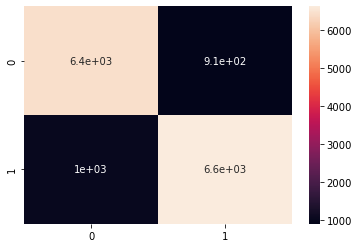

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report , confusion_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print(classification_report)
print(confusion_matrix)

import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

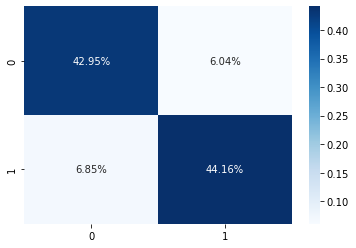

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(SVM, train_vecs, Y_train, cv=4)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    print('Cross-Validation Accuracy min,med,mod', scores.min(), scores.mean(), scores.max())
    print('Results of SVM Classifier on TF-IDF Vectorizer')
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

Cross-Validation Accuracy Scores [0.85874286 0.86068571 0.86125714 0.85611429]
Cross-Validation Accuracy min,med,mod 0.8561142857142857 0.8592 0.8612571428571428
Results of SVM Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7405
           1       0.87      0.86      0.87      7595

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

[[6423  982]
 [1047 6548]]


<AxesSubplot:>

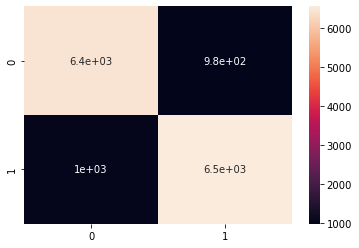

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report , confusion_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print(classification_report)
print(confusion_matrix)

import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

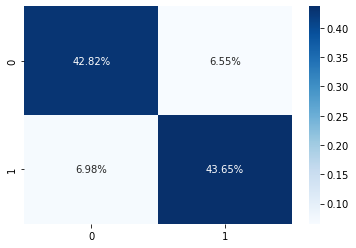

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(DT, train_vecs, Y_train, cv=4)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    print('Cross-Validation Accuracy min,med,mod', scores.min(), scores.mean(), scores.max())
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test)

Cross-Validation Accuracy Scores [0.70754286 0.70754286 0.70365714 0.7       ]
Cross-Validation Accuracy min,med,mod 0.7 0.7046857142857144 0.7075428571428571
Results of Decision Tree Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.56      0.81      0.66      5179
           1       0.87      0.67      0.75      9821

    accuracy                           0.72     15000
   macro avg       0.72      0.74      0.71     15000
weighted avg       0.76      0.72      0.72     15000

[[4194  985]
 [3276 6545]]


<AxesSubplot:>

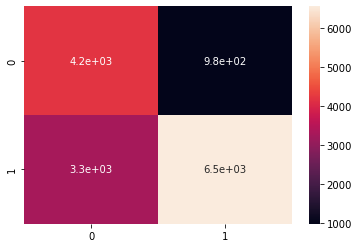

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report , confusion_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer\n')
print(classification_report)
print(confusion_matrix)


import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

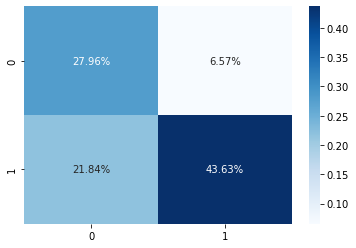

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers

In [ ]:
def XGB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
    XGB.fit(train_vecs, Y_train)

    # Testing
    test_predictionXGB = XGB.predict(test_vecs)
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(XGB, train_vecs, Y_train, cv=4)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    print('Cross-Validation Accuracy min,med,mod', scores.min(), scores.mean(), scores.max())
    return classification_report(test_predictionXGB, Y_test), confusion_matrix(test_predictionXGB, Y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report , confusion_matrix = XGB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Xgboost Classifier on TF-IDF Vectorizer\n')
print(classification_report)
print(confusion_matrix)

NameError: name 'xgb' is not defined

In [ ]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(RF, train_vecs, Y_train, cv=4)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    scores.min(), scores.mean(), scores.max()
    print('Cross-Validation Accuracy min,med,mod', scores.min(), scores.mean(), scores.max())


    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

Cross-Validation Accuracy Scores [0.828      0.8256     0.83142857 0.82777143]
Cross-Validation Accuracy min,med,mod 0.8256 0.8282 0.8314285714285714
Results of Random Forest Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      6971
           1       0.86      0.81      0.84      8029

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000

[[5942 1029]
 [1528 6501]]


<AxesSubplot:>

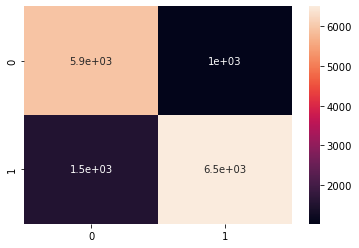

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report , confusion_matrix = RF_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Random Forest Classifier on TF-IDF Vectorizer\n')
print(classification_report)
print(confusion_matrix)


import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

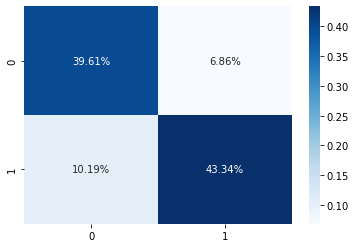

In [ ]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')